<a href="https://colab.research.google.com/github/amkayhani/DSML24/blob/main/2_2_Regression_(Full_ML_Approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - a Full ML Approach

Here we will run the same linear regressions (with and without regularisation) from the first day of the module, but as a full ML project. We start with the importing:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Only works on Jupyter/Anaconda
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from collections import namedtuple
class Boston(namedtuple("Boston",['data', 'feature_names', 'target'])):

    def keys(self):
        return list(self._fields)

def load_boston():
    """
    The Boston dataset has been depracated from SciKit-Learn.
    Load it from the original source.
    """
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')
    return Boston(data, feature_names, target)

### STEP ONE: Read the data
We will also use one of the inbuilt datasets included with _scikit\-learn_:

In [3]:
boston_dataset = load_boston()

As the comment says, this is a well known dataset ... indeed Andrew Ng's first dataset in his first lecture of the first mainstream MOOC in machine learning. Let's look at it:

In [4]:
# show the dataset
print(boston_dataset)

# print a return space
print('\n')

# show the keys
print(boston_dataset.keys())

Boston(data=array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), feature_names=array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'), target=array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 3

As we can see this is actually a dictionary with 'data' (the X's we can use), 'target' (the Y's), 'feature_names' (the names of all of the columns that represent X), 'DESCR' (a description of the data) and 'filename' (I'll let you guess). With this in mind let's add the X's to a DataFrame:

In [5]:
# convert to data frame using Pandas
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We will also create a variable for the Y value:

In [6]:
# create a separate Y value
boston_Y = boston_dataset.target
boston_Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### STEP TWO: Perform data cleaning & transformations
Borrowing from another workbook, we can do some basic data cleaning steps/transformations

In [7]:
print(boston.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [8]:
print(boston_Y.dtype)

float64


All of our values are "float64" - 64-bit real numbers (numbers with decimal points). We are happy with any numerical format which is what this is.

From here we can check for missing values:

*As a brief note on the second command, boston_Y is not a Pandas DataFrame but a numpy "ndarray". By definition an ndarray must all be of the same data type (there is a data type which allows mixed data - records). Becasue of this the command is "dtype" here and "dtypes" for our features DataFrame.*

In [9]:
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [10]:
print(np.isnan(boston_Y))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

No missing values! Let's wrap by noramlising the data.

_Again, note the slightly different (numpy) code when checking the target values. Further note, we could have just added the target to the DataFrame before doing these steps (easier - less code), but its an opportunity to show you the numpy equivalents._

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# get the column names
names = boston.columns

df = scaler.fit_transform(boston)
boston = pd.DataFrame(df, columns=names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699


From here we have a tidy, normalised and clean DataFrame. However, we can do some further engineeering...

### STEP THREE: Feature Engineering
There are many things we can do here of course. For now we will limit it ourselves to check the distribution of the the target value ("MV") and checking for multicolinearity:

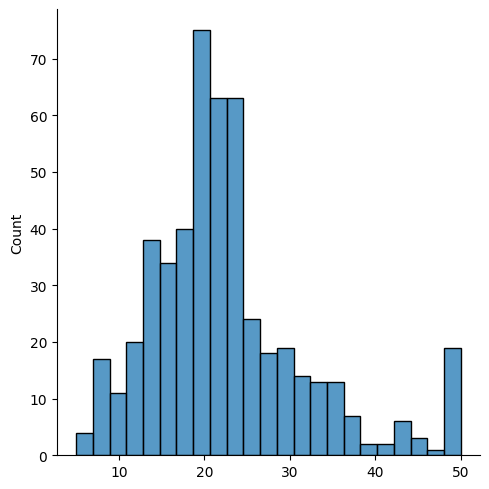

In [12]:
ax = sns.displot(boston_Y)

<Axes: >

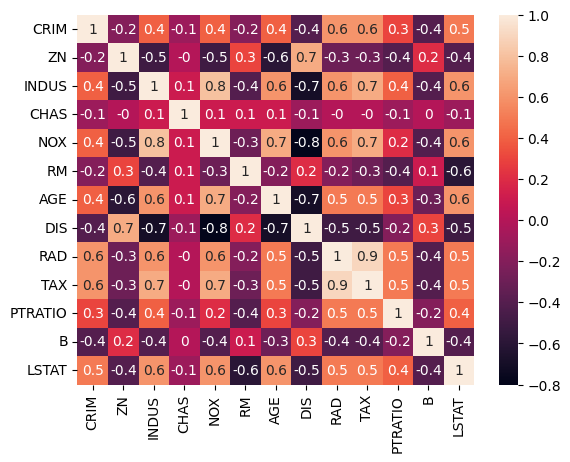

In [13]:
# create a correlation matrix rounding to one decimal point
correlation_matrix = boston.corr().round(1)
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

The normality of our target is clearly not perfect, but probably close enough for us not to worry too much.

We also use it to see if any of our features have high positive or negative correlation. There are a few we might be concerned about but the most so is "RAD" and "TAX" at 0.9. We should probably drop one but which? We could take a data driven approach and compare their correlation with "MV". In this case "RAD" is -0.4 and "TAX" -0.5 - so "TAX" has the stronger effect and "RAD" should be dropped. We may also consider what the data means (theory driven). To save you going back to the description in the previous Notebook, "RAD" is defined as "[the] index of accessibility to radial highways" and "TAX" as "full-value property-tax rate per \$10,000". So one relates to closeness to key roads and the other relates to property tax ... I would assume "TAX" to be more relevant in our task. Either way we arrive at the same conclusion and should drop "RAD".

In [14]:
boston = boston.drop(['RAD'], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.279070,-0.125000,0.261902,-0.602699


For this quick example this will be enough ... but obviously feature engineering is a key process so you would spend more time on this, and also you will never normally get a dataset this clean!

### STEP FOUR: Separate the target value
Nothing to do here as our target value is already separate.

### STEP FIVE: Split the data into training and test sets
We will use an 80/20 split as we did before:

In [15]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston, boston_Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


### STEP SIX: Select the algorithms
In keeping with the approach we previously used, we will select the following algorithms:


1.   Linear Regression
2.   Lasso Regression ($L1$ Regularisation)
2.   Ridge Regression ($L2$ Regularisation)
2.   ElasticNet (Both $L1$ and $L2$ Regularisation)



### STEP SEVEN: Optimise hyperparameters
The following hyperparameters should be optimised:
1.   Linear Regression - no hyperparameters
2.   Lasso Regression - $\alpha$ (alpha)
2.   Ridge Regression - $\alpha$ (alpha)
2.   ElasticNet - $\alpha$ (alpha) and $L1$ ratio (how much of the penalty should be $L1$ and how much $L2$)

We will discuss hyperparameter optimisation strategies in later slides. For now, just use the following code:

#### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75]}] # test the listed alpha values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(Lasso(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.25}




#### Ridge Regression

In [17]:
from sklearn.linear_model import Ridge

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75]}] # test the listed alpha values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(Ridge(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.75}




#### ElasticNet

In [18]:
from sklearn.linear_model import ElasticNet

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75], # test the listed alpha values
                     'l1_ratio': [0.25, 0.5, 0.75]}] # test the listed L1 ratio values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(ElasticNet(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.25, 'l1_ratio': 0.75}




The final list is:
1.   Linear Regression - still no hyperparameters
2.   Lasso Regression - $\alpha = 0.25$
2.   Ridge Regression - $\alpha = 0.75$
2.   ElasticNet - $\alpha = 0.25$ and $L1$ ratio $= 0.75$

_Note, as we will disucss it is possible you may have different results!_

### STEP EIGHT: Run the algorithms/build the models
Let's see who wins!

In [19]:
from sklearn.linear_model import LinearRegression

# fit the LR model to the training data
lin_model = LinearRegression()

# fit the Lasso model
l1_model = Lasso(alpha=0.25)

# fit the Ridge model
l2_model = Ridge(alpha=0.75)

# fit the ElasticNet model
enet = ElasticNet(alpha=0.25, l1_ratio=0.75)

# make a list of models to iterate (loop) through
models = [lin_model, l1_model, l2_model, enet]

for model in models:
  # fit model
  fitted_model = model.fit(X_train, Y_train)

  # predict every Y value in the dataset
  boston_predict = fitted_model.predict(X_train)

  # calculate RMSE (root mean square error) and R^2 (predictive power)
  from sklearn.metrics import mean_squared_error, r2_score
  rmse = (np.sqrt(mean_squared_error(Y_train, boston_predict)))
  r2 = r2_score(Y_train, boston_predict)

  # print the performance metrics
  print(f' {model} - Model performance')
  print("--------------------------------------")
  print(f'RMSE is {rmse}')
  print(f'R2 score is {r2}')
  print('\n')

 LinearRegression() - Model performance
--------------------------------------
RMSE is 4.797615453625907
R2 score is 0.723868135207919


 Lasso(alpha=0.25) - Model performance
--------------------------------------
RMSE is 5.034332134511182
R2 score is 0.6959469355715313


 Ridge(alpha=0.75) - Model performance
--------------------------------------
RMSE is 4.797820327823884
R2 score is 0.7238445511992401


 ElasticNet(alpha=0.25, l1_ratio=0.75) - Model performance
--------------------------------------
RMSE is 5.057286281810248
R2 score is 0.6931679413662111




### STEP NINE: Select the best model
Our results suggest Lasso and ElasticNet show weaker overall performance. There is only a small difference between vanilla Linear Regression and Ridge Regression, with the vanilla model doing slightly better? So, which should we choose?

Although it performs slightly worse I would pick Ridge. The difference on both metrics is very, very small but the $L2$ regularisation penalty means we should be better protected against overfitting. 0.0001 less $R^2$ seems like a very cheap price to pay for this extra protection.

### STEP TEN: Predict the test data and evaluate performance
Let's put our model to work!

In [20]:
# fit the model to the training data
l2_model_fit = l2_model.fit(X_train, Y_train)

# predict the data
boston_predict = l2_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
rmse = (np.sqrt(mean_squared_error(Y_test, boston_predict)))
r2 = r2_score(Y_test, boston_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 5.025286607087953
R2 score is 0.7141811474869717




We can see some drop in performance from training (but this is to be expected to some extent as the model hasn't seen this data). If we consider 4.4 RMSE and/or 77% $R^2$ to be too low, we may go back and start the process again with different algorithms, but in this case we will consider it acceptable:



#### STEP ELEVEN: Party time
![](https://drive.google.com/uc?export=view&id=10wW-fH93pxZEo78Ve2wviJmZEitqjcWj)